In [1]:
import pandas as pd
import numpy as np

In [5]:
news = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv", index_col = 0)
news.head(3)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN


In [6]:
news.groupby('type').size().sort_values(ascending = False)

type
fake          155
conspiracy     31
political      23
unreliable      6
unknown         6
junksci         6
bias            6
reliable        3
hate            1
clickbait       1
dtype: int64

In [7]:
# some contents may same, remove
news2 = news.drop_duplicates('content', 'first')
news2.groupby('type').size().sort_values(ascending = False)

type
fake          146
conspiracy     31
political      22
unreliable      6
unknown         6
bias            6
junksci         5
reliable        3
hate            1
clickbait       1
dtype: int64

In [272]:
df = pd.DataFrame(news2, columns = ['id', 'type', 'content', 'title', 'domain'])
df.head(3)

,id,type,content,title,domain
0,141,unreliable,Sometimes the power of Christmas will make you...,Church Congregation Brings Gift to Waitresses ...,awm.com
1,256,fake,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,beforeitsnews.com
2,700,unreliable,Never Hike Alone: A Friday the 13th Fan Film U...,Never Hike Alone - A Friday the 13th Fan Film ...,cnnnext.com


In [273]:
df.isnull().sum()

id          0
type       12
content     0
title       0
domain      0
dtype: int64

In [274]:
df = df.dropna()

Text(0.5, 1.0, 'Number of articles by type')

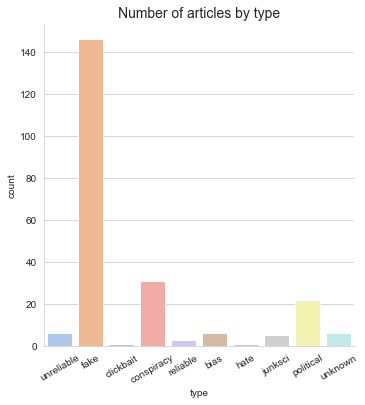

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_hls_values
type_plot = sns.catplot('type', data = df, kind = 'count')
(type_plot.set_xticklabels(rotation=30)
          .ax.set_title('Number of articles by type', fontsize = 14)
          )

In [276]:
# Some types of samples are insufficient, merge labels
# df['type'].replace(
    # ['conspiracy', 'junksci', 'rumor', 'hate', 'unreliable', 'fake'], 'fake', inplace = True)
df['type'].replace(
    ['reliable', 'political'], 'truth', inplace = True)
df['type'].replace(
    ['conspiracy', 'junksci', 'rumor', 'hate', 'unreliable', 'clickbait', 'unknown', 'satire', 'bias'], 'others', inplace = True)

Text(0.5, 1.0, 'Number of articles by merged type')

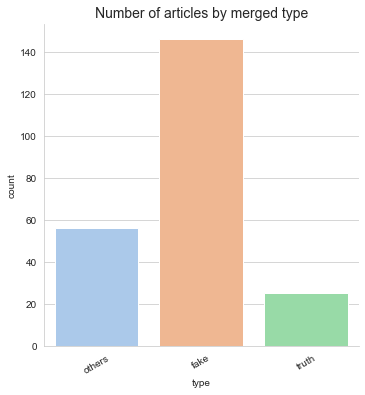

In [277]:
sns.set_palette('pastel')
type_plot2 = sns.catplot('type', data = df, kind = 'count', )
(type_plot2.set_xticklabels(rotation=30)
          .ax.set_title('Number of articles by merged type', fontsize = 14)
          )

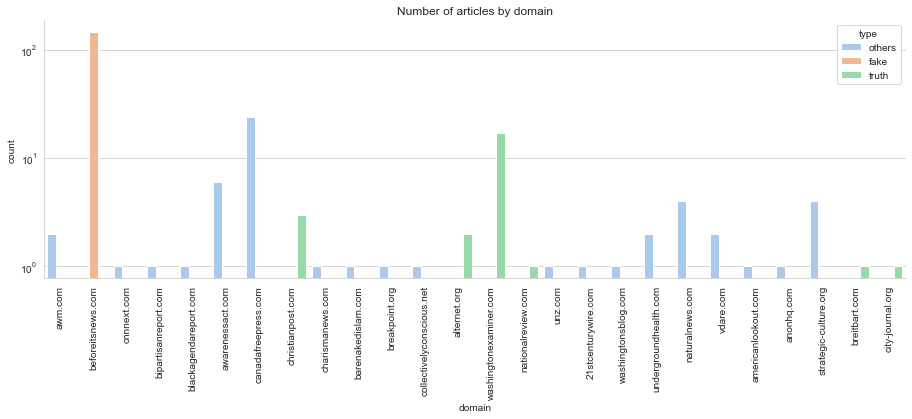

In [278]:
domain_plot = sns.catplot(x="domain", hue="type", data=df, kind="count", legend_out=False)
(domain_plot.set_xticklabels(rotation = 90)
            .set(yscale = 'log', title = 'Number of articles by domain')
            .fig.set_size_inches(15,4))

In [279]:
import re
from nltk.tokenize import RegexpTokenizer

In [280]:
def clean(text):
    #Remove URLs
    text = re.sub(r'(http|https?:\/\/)?((?:(\w+-)*\w+)\.)+(?:[a-z]{2})(\/?\w?-?=?_?\??&?)+[\.]?([a-z0-9\?=&_\-%#])?', '', text)
    #lower texts
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokenizer1 = RegexpTokenizer('\w+[\d\.]+|\S+')
    tokens1 = tokenizer1.tokenize(text)
    #only keep vocabulary
    voc = [i for i in tokens1 if i.isalpha()]
    return voc

In [281]:
df2 = df.copy(deep=True)

In [282]:
# Extract the digits in contents
df2['dig_in_content'] = df2.apply(lambda x: re.sub(r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?', '', x['content']), axis=1)
df2['dig_in_content'] = df2.apply(lambda x: re.findall(r"\d+\.?\d*",x['dig_in_content']), axis=1)
# tokenize contents
df2['content'] = df2.apply(lambda x: clean(x['content']), axis=1)
# tokenize title
df2['title'] = df2.apply(lambda x: clean(x['title']), axis=1)
# get word count
df2['len_content'] = df2.apply(lambda x: len(x['content']), axis=1)
df2['len_title'] = df2.apply(lambda x: len(x['title']), axis=1)

Text(0.5, 1.0, 'Word count of different types for contents')

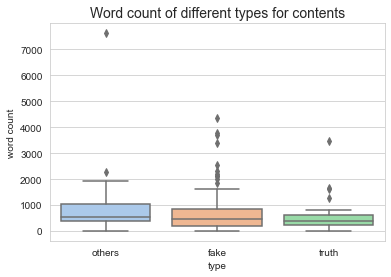

In [283]:
box1 = sns.boxplot(x=df2['type'], y=df2['len_content'])
box1.set(ylabel='word count')
box1.set_title('Word count of different types for contents', fontsize = 14)

Text(0.5, 1.0, 'Word count of different types for contents')

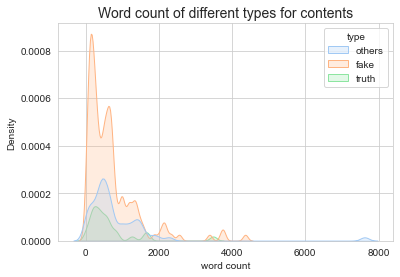

In [284]:
dis1 = sns.kdeplot(data = df2, x="len_content", hue = 'type', bw_adjust=.25, fill=True)
dis1.set(xlabel='word count')
dis1.set_title('Word count of different types for contents', fontsize = 14)

Text(0.5, 1.0, 'Word count of different types for titles')

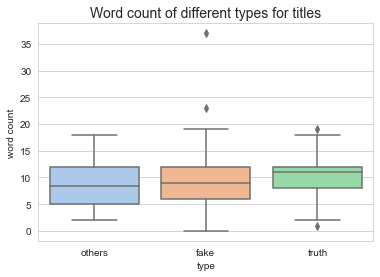

In [285]:
box2 = sns.boxplot(x=df2['type'], y=df2['len_title'])
box2.set(ylabel='word count')
box2.set_title('Word count of different types for titles', fontsize = 14)

Text(0.5, 1.0, 'Word count of different types for titles')

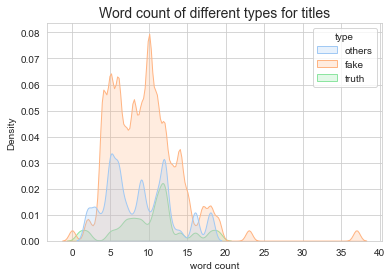

In [286]:
dis2 = sns.kdeplot(data = df2, x="len_title", hue = 'type', bw_adjust=.25, fill=True)
dis2.set(xlabel='word count')
dis2.set_title('Word count of different types for titles', fontsize = 14)

In [287]:
df3 = df2.explode('dig_in_content').reset_index(drop=True)
df3 = df3.dropna()
df3['dig_in_content'] = df3['dig_in_content'].astype(float)

In [288]:
df3.groupby('type')['dig_in_content'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
fake,1596.0,1583.602130,15462.682027,0.0,8.0,40.0,1978.0,411001.0
others,616.0,625.566558,895.742003,0.0,11.0,40.0,1960.0,5000.0
truth,192.0,593.947917,866.363947,0.0,11.0,39.0,1940.5,2018.0


Text(0.5, 1.0, 'digits of different types for titles')

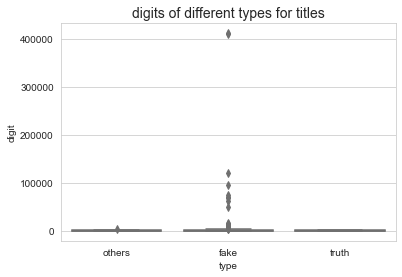

In [312]:
box3 = sns.boxplot(x=df3['type'], y=df3['dig_in_content'])
box3.set(ylabel='digit')
box3.set_title('digits of different types for titles', fontsize = 14)

In [290]:
from matplotlib.cbook import boxplot_stats   
np.sort(boxplot_stats(df3['dig_in_content']).pop(0)['fliers'])

array([  5000.,   5000.,   5000.,   5195.,   5441.,   5441.,   7241.,
         7241.,   7419.,   8507.,   9126.,   9126.,   9674.,   9750.,
        10951.,  11051.,  11051.,  12881.,  13526.,  13642.,  17304.,
        49827.,  61401.,  69200.,  71362.,  75252.,  95640., 120000.,
       409020., 411001.])

In [291]:
#remove outlierss and big numbers
df4 = df3.drop(df3[df3['dig_in_content'] > 12000].index)

In [292]:
df4.groupby('type')['dig_in_content'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
fake,1583.0,699.540745,1175.531402,0.0,8.0,38.0,1969.5,11051.0
others,616.0,625.566558,895.742003,0.0,11.0,40.0,1960.0,5000.0
truth,192.0,593.947917,866.363947,0.0,11.0,39.0,1940.5,2018.0


Text(0.5, 1.0, 'digits of different types for contents, remove some outliers')

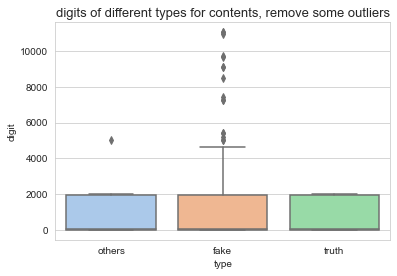

In [315]:
box3 = sns.boxplot(x=df4['type'], y=df4['dig_in_content'])
box3.set(ylabel='digit')
box3.set_title('digits of different types for contents, remove some outliers', fontsize = 13)

Text(0.5, 1.0, 'digits of different types for contents')

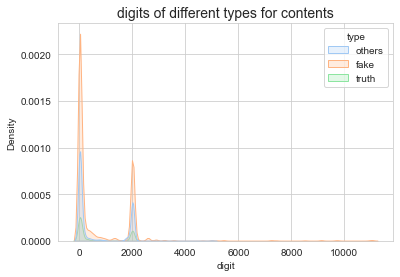

In [316]:
dis3 = sns.kdeplot(data = df4, x="dig_in_content", hue = 'type', bw_adjust=.25, fill=True)
dis3.set(xlabel='digit')
dis3.set_title('digits of different types for contents', fontsize = 14)

Text(0.5, 1.0, 'digits of different types for contents, cut off at 3500')

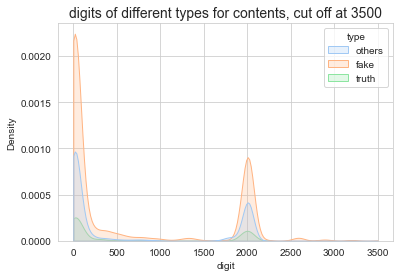

In [317]:
dis4 = sns.kdeplot(data = df4, hue = 'type', x="dig_in_content", bw_adjust=.25, fill=True, clip=(0,3500))
dis4.set(xlabel='digit')
dis4.set_title('digits of different types for contents, cut off at 3500', fontsize = 14)

In [296]:
from nltk.stem import WordNetLemmatizer 

In [ ]:
#import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')

In [300]:
#from nltk.stem import WordNetLemmatizer 
#wnl = WordNetLemmatizer() 
df5 = df2.explode('content').reset_index(drop=True)
#df4['content'] = df4.apply(lambda x: wnl.lemmatize(x['content']), axis=1)

In [301]:
df5

,id,type,content,title,domain,dig_in_content,len_content,len_title
0,141,others,sometimes,"[church, congregation, brings, gift, to, waitr...",awm.com,"[3, 500]",504,14
1,141,others,the,"[church, congregation, brings, gift, to, waitr...",awm.com,"[3, 500]",504,14
2,141,others,power,"[church, congregation, brings, gift, to, waitr...",awm.com,"[3, 500]",504,14
3,141,others,of,"[church, congregation, brings, gift, to, waitr...",awm.com,"[3, 500]",504,14
4,141,others,christmas,"[church, congregation, brings, gift, to, waitr...",awm.com,"[3, 500]",504,14
...,...,...,...,...,...,...,...,...
161509,39468,fake,you,"[useful, items, for, your, tiny, home]",beforeitsnews.com,[4],574,6
161510,39468,fake,just,"[useful, items, for, your, tiny, home]",beforeitsnews.com,[4],574,6
161511,39468,fake,cannot,"[useful, items, for, your, tiny, home]",beforeitsnews.com,[4],574,6
161512,39468,fake,do,"[useful, items, for, your, tiny, home]",beforeitsnews.com,[4],574,6


In [302]:
df6 = df5.drop(columns=['id', 'title', 'domain', 'dig_in_content', 'len_content'])
def my_merge(df):
    return','.join(df.values)
df6 = df6.groupby(['type'])['content'].apply(my_merge)
df6 = df6.reset_index()

In [303]:
df6

,type,content
0,fake,"awakening,of,strands,of,dna,reconnecting,with,..."
1,others,"sometimes,the,power,of,christmas,will,make,you..."
2,truth,"i,wish,i,had,done,so,when,our,nowadult,daughte..."


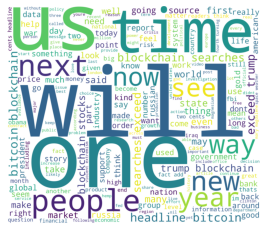

In [304]:
from wordcloud import WordCloud
# fake
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(df6['content'][0])
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

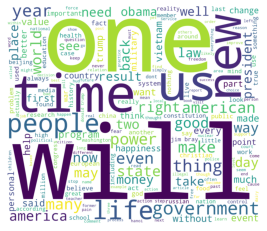

In [305]:
# others
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(df6['content'][1])
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

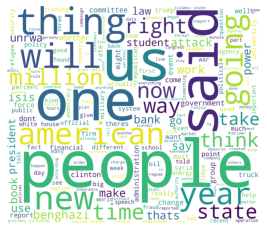

In [306]:
# truth
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(df6['content'][2])
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [307]:
# remove stopwords
from nltk.corpus import stopwords 
stop = set(stopwords.words('english'))
filter_fake = [w for w in df6['content'][0].split(',') if w not in stopwords.words('english')]
filter_others = [w for w in df6['content'][1].split(',') if w not in stopwords.words('english')]
filter_truth = [w for w in df6['content'][2].split(',') if w not in stopwords.words('english')]

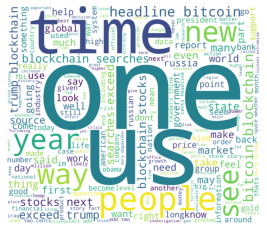

In [308]:
# fake
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(','.join(filter_fake))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

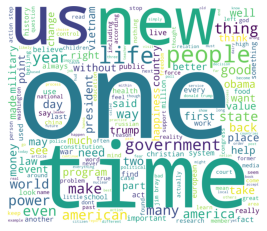

In [309]:
# others
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(','.join(filter_others))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

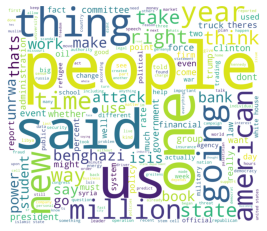

In [310]:
# trurh
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(','.join(filter_truth))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()